# Machine Learning Workshop - Predicting Patient Diabetes with Machine Learning

## Accessing this material

All material used in this workshop can be downloaded at **[https://github.com/alexgcsa/ml_workshop_Oct2023](https://github.com/alexgcsa/ml_workshop_Oct2023)**.

Instructions for local installation are detailed in the *README.md* file.


## Outline
- Task Overview;
- Download Data and Requirement Files;
- Patient Data Exploration;
- Supervised Machine Learning:
    - Classification -- Identifying diabetic and non-diabetic (healthy) patients.


##

## Task Overview

The problem we will solve is **predicting patient diabetes with machine learning using medical and demographic data**.

For this task, we will use a modified/compacted version of a dataset from a **[Kaggle Competition](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/)**. This dataset includes variables (features) such as:
 1) age;
 2) gender -- Distinguished in this data between male (1) and female (0);
 3) If the patient has or does not have hypertension (0: not having; 1: having);
 4) If the patient has or does not have heart disease (0: not having; 1: having);
 5) Body Mass Index (BMI);
 6) Smoking history -- Never or ever smoked (0: never; ever: 1);
 7) Blood glucose level;
 8) HbA1c level -- Average blood glucose (sugar) levels for the last two to three months.

Together with these features, patients are differentiated by their IDs and diabetes status (non-diabetic patient; diabetic patient).

We can use this data and these features to build **machine learning models** to predict diabetes in patients based on their medical history and demographic information. 

This can be useful for healthcare professionals in identifying patients at risk of developing diabetes and in developing personalised treatment plans.

##

## Download Data and Requirement Files

In [149]:
!wget https://raw.githubusercontent.com/alexgcsa/ml_workshop_Oct2023/master/data/diabetes_compact.csv
!wget https://raw.githubusercontent.com/alexgcsa/ml_workshop_Oct2023/master/requirements.txt
!wget https://raw.githubusercontent.com/alexgcsa/ml_workshop_Oct2023/master/utils.py

--2023-10-02 00:30:29--  https://raw.githubusercontent.com/alexgcsa/ml_workshop_Oct2023/master/data/diabetes_compact.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13686 (13K) [text/plain]
Saving to: ‘diabetes_compact.csv’

diabetes_compact.cs 100%[===================>]  13,37K  --.-KB/s    in 0,001s  

2023-10-02 00:30:30 (9,52 MB/s) - ‘diabetes_compact.csv’ saved [13686/13686]

--2023-10-02 00:30:30--  https://raw.githubusercontent.com/alexgcsa/ml_workshop_Oct2023/master/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200

## Installing dependencies

In [87]:
!pip install -r requirements.txt

## Loading libraries

In [111]:
%load_ext autoreload
%autoreload 2

from plotly.offline import iplot, init_notebook_mode
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn import tree
from sklearn import ensemble
from sklearn.model_selection import cross_val_predict, train_test_split


import numpy as np
import pandas as pd
import time

import utils

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##

## Exploring the data

In [150]:
# Load data from file to a DataFrame structure:
df_data = pd.read_csv("diabetes_compact.csv") 

print(df_data.shape) # .shape displays how the dataframe (matrix) looks like
df_data.head(10) # .head(10) displays the first 10 items in the dataframe

(550, 8)


,patient_id,gender,age,hypertension,heart_disease,bmi,smoking_history,diabetes
0,55356,0,29,0,0,26.67,0,0
1,899,0,38,0,0,29.64,1,0
2,95746,0,24,0,0,29.83,0,0
3,1048,0,61,0,1,27.19,1,0
4,24624,0,45,0,0,24.30,0,0
5,86217,0,55,0,0,27.32,0,0
6,65787,1,49,0,0,27.47,1,0
7,39339,0,17,0,0,19.77,0,0
8,76637,0,53,0,0,24.88,1,0
9,27763,1,37,0,0,34.62,0,0


In [91]:
df_data.tail(10) # .tail(10) displays the last 10 items in the dataframe

,patient_id,gender,age,hypertension,heart_disease,bmi,smoking_history,class
540,59918,1,47,0,0,29.48,1,Diabetic
541,64512,1,34,1,0,30.30,0,Diabetic
542,90682,1,61,0,0,36.18,1,Diabetic
543,30329,1,71,0,0,37.90,1,Diabetic
544,52284,1,42,1,0,25.51,1,Diabetic
545,35013,0,80,1,0,25.60,1,Diabetic
546,4003,0,73,1,0,27.80,0,Diabetic
547,88088,0,48,1,0,30.53,0,Diabetic
548,87553,1,45,0,1,36.47,1,Diabetic
549,36625,0,80,0,1,29.54,0,Diabetic


###

### Plotting the distribution of diabetic patients *versus* non-diabetic patients

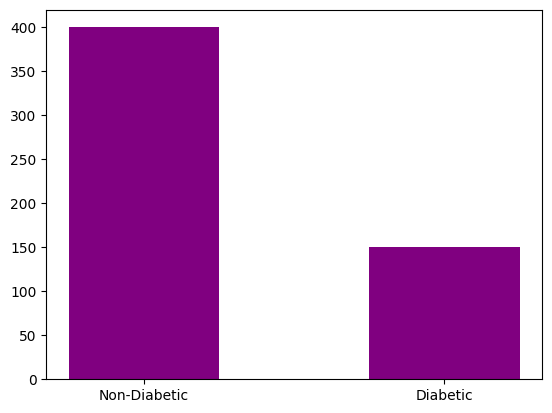

In [93]:
#Counting the frequencies:
diabetes_counts = dict(df_data["class"].value_counts())

#getting the classes:
classes = list(diabetes_counts.keys())

#Getting the values per class:
values = list(diabetes_counts.values())

#Making the plot:
fig = plt.bar(classes, values, color ='purple',  width = 0.5)

#### What can you conclude from the plot above?

###

### Plotting the distribution of patient features

In [94]:
columns = ["gender", "age", "hypertension", "heart_disease", "bmi", "smoking_history"]

fig = make_subplots(rows=3, cols=2, start_cell="bottom-left")

nrows = 3
ncols = 2

# Iterate through columns in reverse order
for i in range(nrows):
    for j in range(ncols):
        col_index = (nrows - i - 1) * ncols + j  # Calculate the correct column index in reverse order
        if col_index < len(columns):
            column_name = columns[col_index]
            fig.add_trace(go.Histogram(x=df_data[column_name], name=column_name), row=i + 1, col=j + 1)


fig.show(renderer="colab")

#### What can you conclude from the several plots above?

###

### Supervised Machine Learning (Classification)

Your task is to build a classifier to differentiate diabetic patients from non-diabetic patients.

First, use the code below to select  specific columns for the basic features (**df_data**).

In [96]:
# The target class and the main features from the dataset:
target = "class"
features =  ["gender", "age", "hypertension", "heart_disease", "bmi", "smoking_history"]

# Select them from data:
X = df_data[features]
y = df_data[target]

######

#### Data Splitting

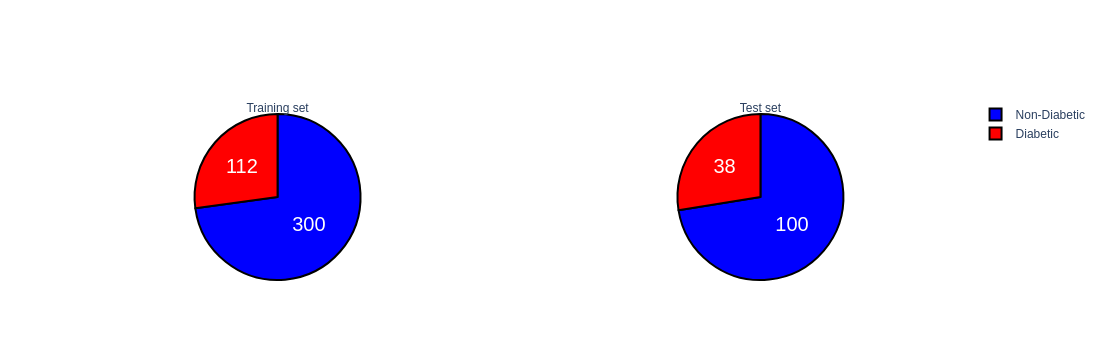

In [109]:
# What is the best TEST_SIZE? 
TEST_SIZE = 0.25

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, \
                                                    random_state=42)

utils.plot_train_test_class(y_train, y_test)

#### Why is data splitting necessary?

If you check in the code lines above, you used a function **train_test_split**. This function divides our data into two subsets: the **training set** and the **testing set**. The training set is used to train (i.e., build) the model. The testing set is used to evaluate the model, assessing its predictive performance.

This step is very important because it helps ensure the creation of machine learning models is valid and accurate. Using the testing set (a subset completely unseen during the training of the model), you can estimate the model's performance when it is applied to new data points.  

**What do you think of having the same proportions of Diabetic and Non-Diabetic patients in the training and testing sets? Is this a fair approach?**

####

### First model: Decision Tree

Decision trees are composed of if/else questions which are disposed of hierarchically. Following these questions, the model is capable of reaching a decision. In the case of our question, the actual output is 'diabetic' or 'diabetic' labels. The decision to reach a prediction is based on the features (patient demographics and medical information) we used as input for the ML algorithm.

##### Training the decision tree on the set of features

In [133]:
# What happens when you change the max depth of the decision tree?
clf_dt = tree.DecisionTreeClassifier(max_depth=3, random_state=42)

# What happens if you change the number of folds in the cross-validation from 5 to 3 (or 10)?
y_pred_train_dt = cross_val_predict(clf_dt, X_train, y_train, cv=5)
clf_dt.fit(X_train, y_train)
y_pred_test_dt = clf_dt.predict(X_test)

###### 

##### Estimate the predictive performance given the metrics Precision, Recall and F1-Score, which are calculated using the Confusion Matrix below:

Performance on Training (k-fold cross validation)
              precision    recall  f1-score   support

    Diabetic       0.55      0.31      0.40       112
Non-Diabetic       0.78      0.90      0.84       300

    accuracy                           0.74       412
   macro avg       0.66      0.61      0.62       412
weighted avg       0.72      0.74      0.72       412

Performance on Test set
              precision    recall  f1-score   support

    Diabetic       0.40      0.05      0.09        38
Non-Diabetic       0.73      0.97      0.83       100

    accuracy                           0.72       138
   macro avg       0.56      0.51      0.46       138
weighted avg       0.64      0.72      0.63       138



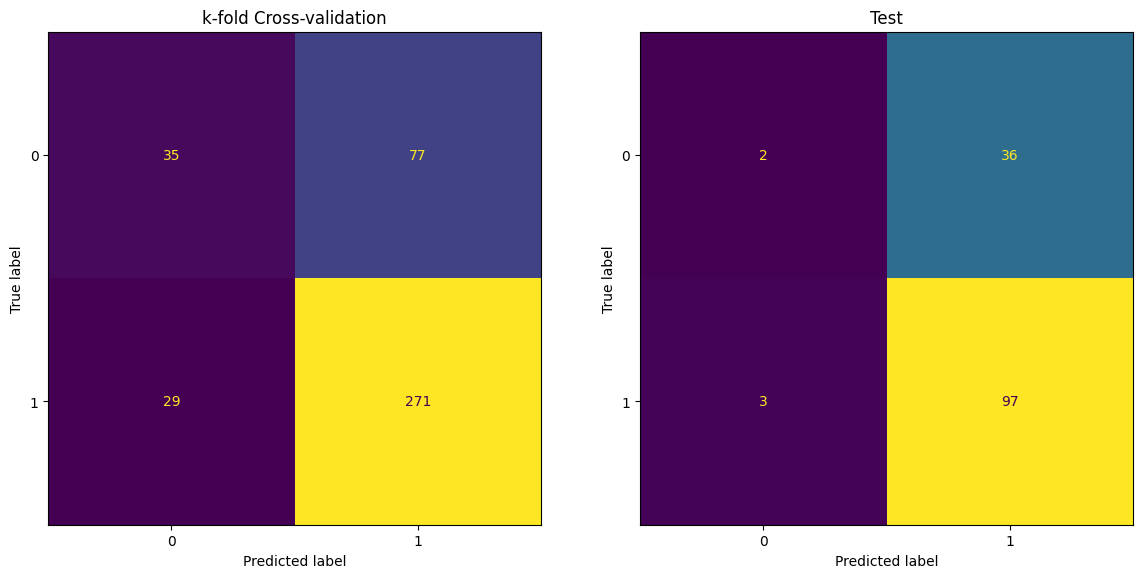

In [130]:
utils.gen_train_test_cm(y_train, y_pred_train_dt, y_test, y_pred_test_dt, ['Not-Diabetic', 'Diabetic'])

###### 

##### How do the ROC AUC plot look like?

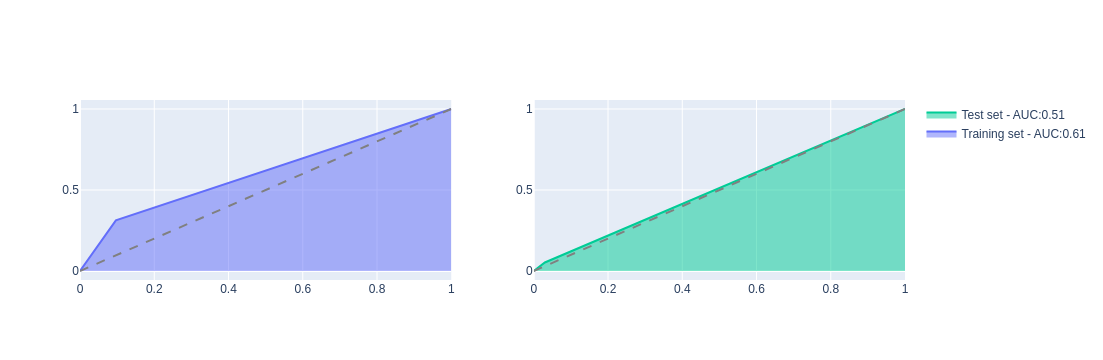

In [132]:
utils.gen_train_test_roc(y_train, y_pred_train_dt, y_test, y_pred_test_dt, ['Not-Diabetic', 'Diabetic'])

##### What does the decision tree looks like?

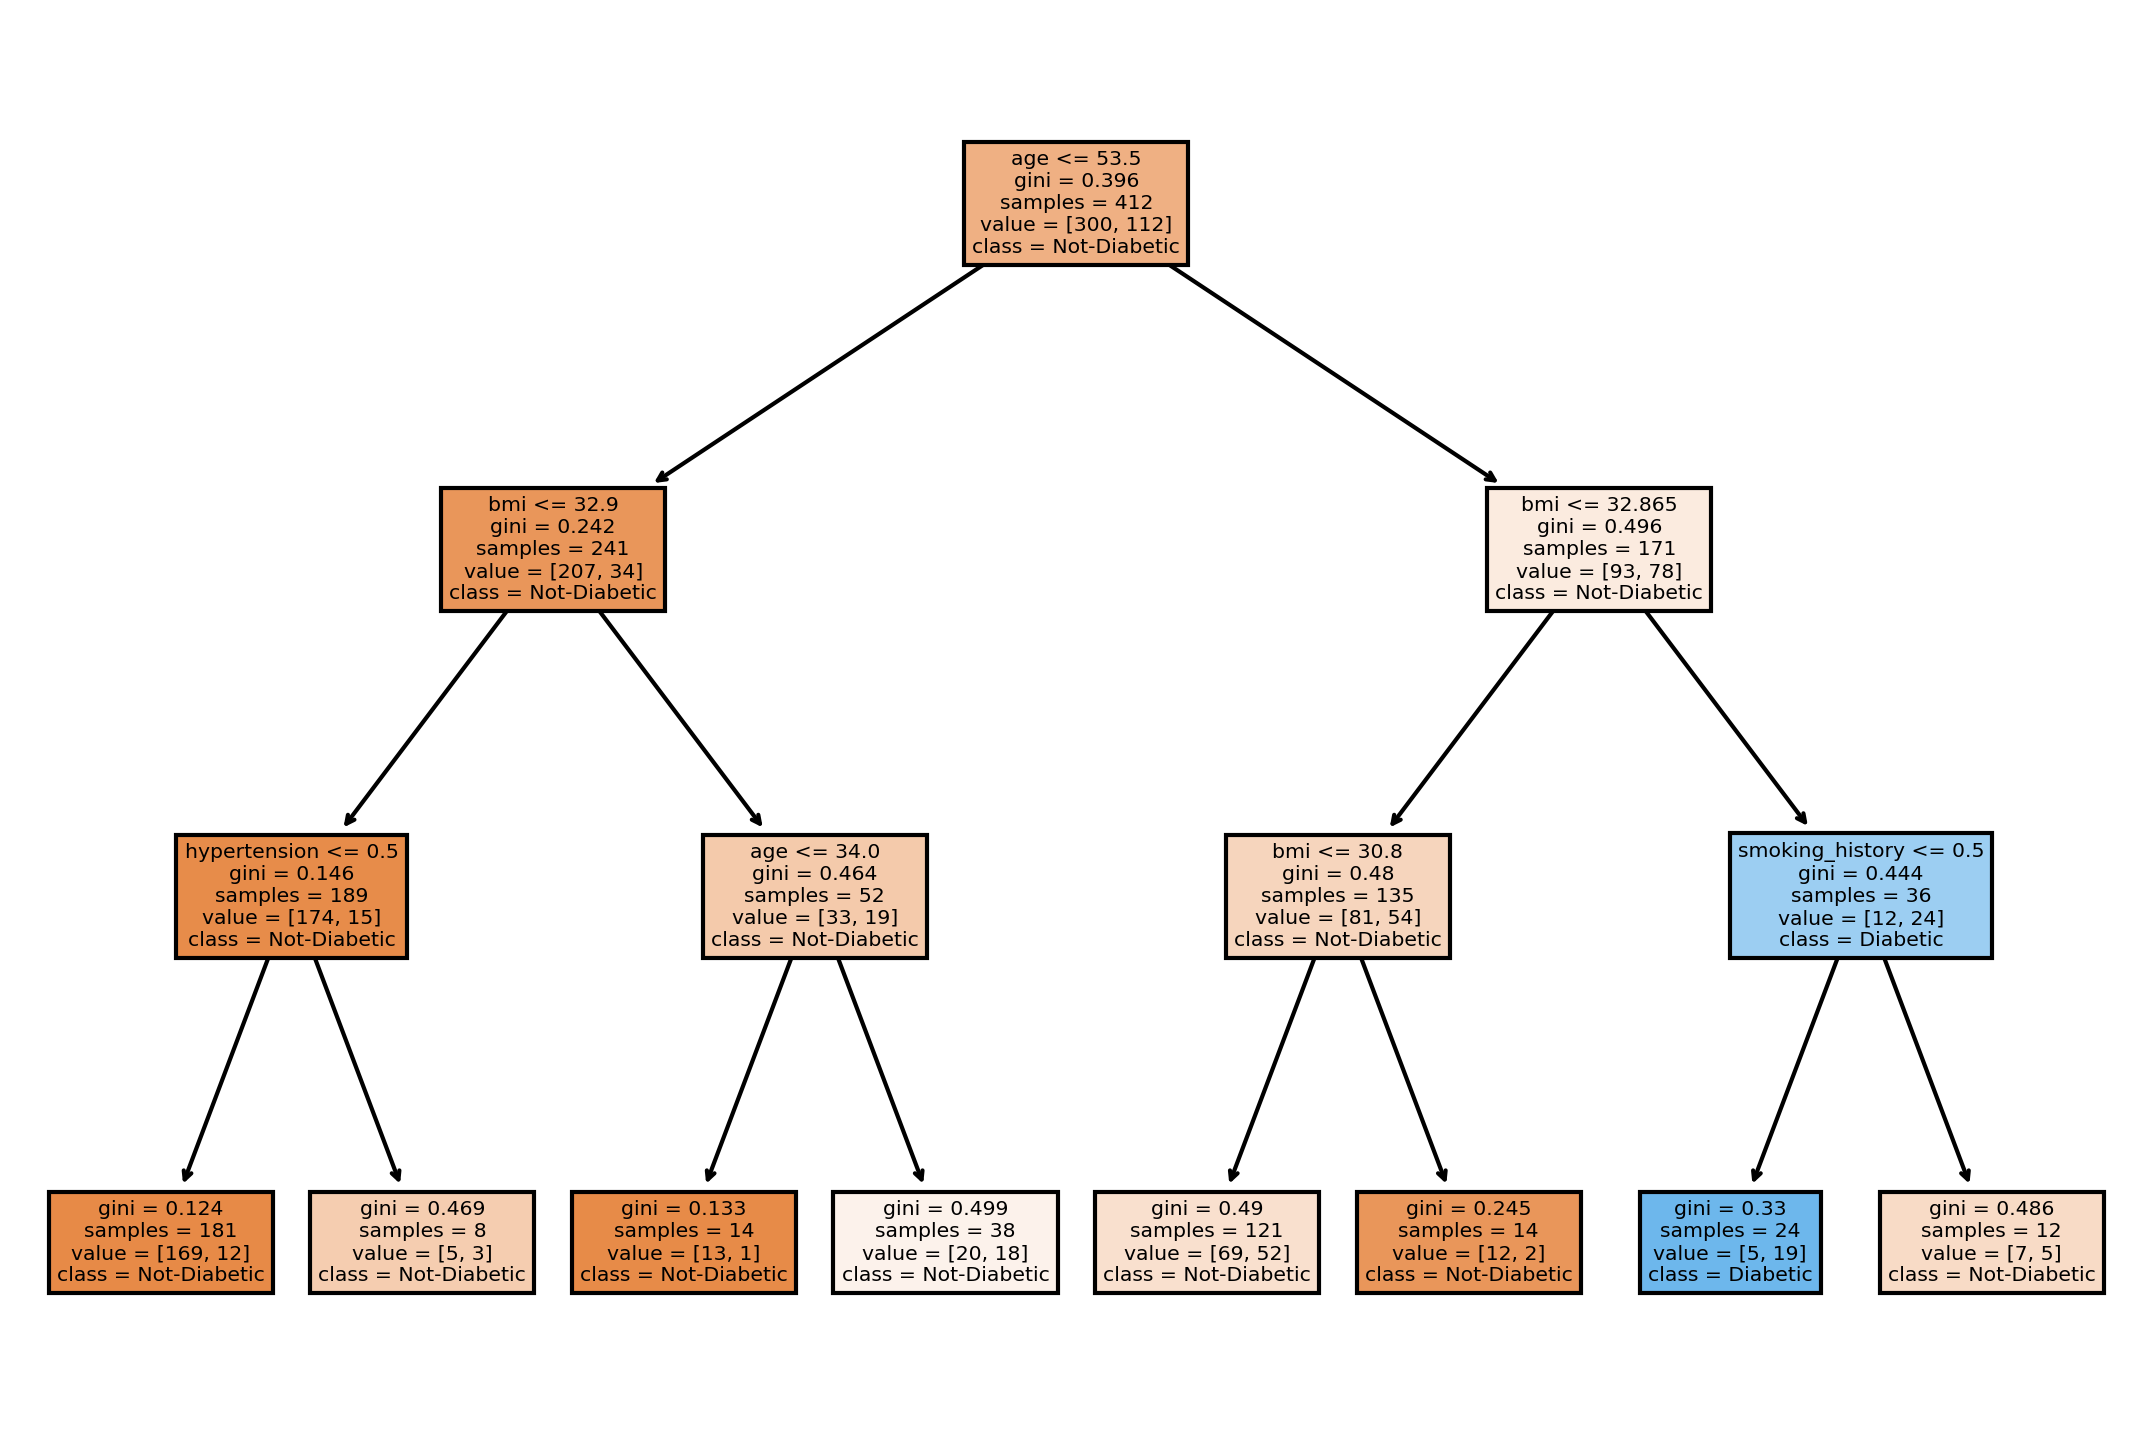

In [86]:
fig, axes = plt.subplots(nrows=1 ,ncols=1, figsize=(9,6), dpi=300)
tree.plot_tree(clf_dt, feature_names=X_train.columns, class_names=['Not-Diabetic', 'Diabetic'], filled=True)
plt.show()

##### 

##### Which features are more important for the model?

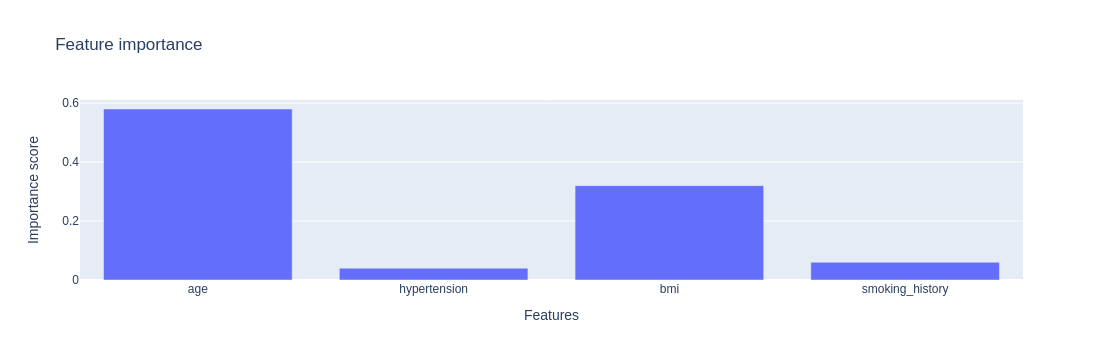

In [138]:
utils.feat_importance(clf_dt)

#### What can you conclude from the predictive performance of the Decision Tree? What can you say about the important features above?

#####

#### TO-DO: Go back and modify a few things for the Decision Tree. What happens with your results and derived conclusions?

1. Change the percentage value for the testing set in **Data Splitting**. What are the outcomes?
2. Change the **max_depth** when setting the decision tree. What happens?
3. Change the number of folds in the cross-validation (**cv**) procedure from 5 to 3 or 10. Why is setting this number important?

##

### Second model: Random Forest

A Random Forest ( RF) is also a tree-based model. However, it is an ensemble of multiple random decision trees of different kinds (considering different data and different features). The final value of the model is the average of all the prediction/estimates created by each individual decision tree.

##### Training the random forest on the set of features

In [145]:
# What happens when you change the number of trees (n_estimators) in the random forest?
clf_rf = ensemble.RandomForestClassifier(n_estimators=300, random_state=42)

# What happens if you change the number of folds in the cross-validation from 5 to 3 (or 10)?
y_pred_train_rf = cross_val_predict(clf, X_train, y_train, cv=5)
clf_rf.fit(X_train, y_train)
y_pred_test_rf = clf_rf.predict(X_test)

###### 

##### Training the decision tree on the set of features

Performance on Training (k-fold cross validation)
              precision    recall  f1-score   support

    Diabetic       0.53      0.48      0.50       112
Non-Diabetic       0.81      0.84      0.83       300

    accuracy                           0.74       412
   macro avg       0.67      0.66      0.67       412
weighted avg       0.74      0.74      0.74       412

Performance on Test set
              precision    recall  f1-score   support

    Diabetic       0.49      0.45      0.47        38
Non-Diabetic       0.80      0.82      0.81       100

    accuracy                           0.72       138
   macro avg       0.64      0.63      0.64       138
weighted avg       0.71      0.72      0.71       138



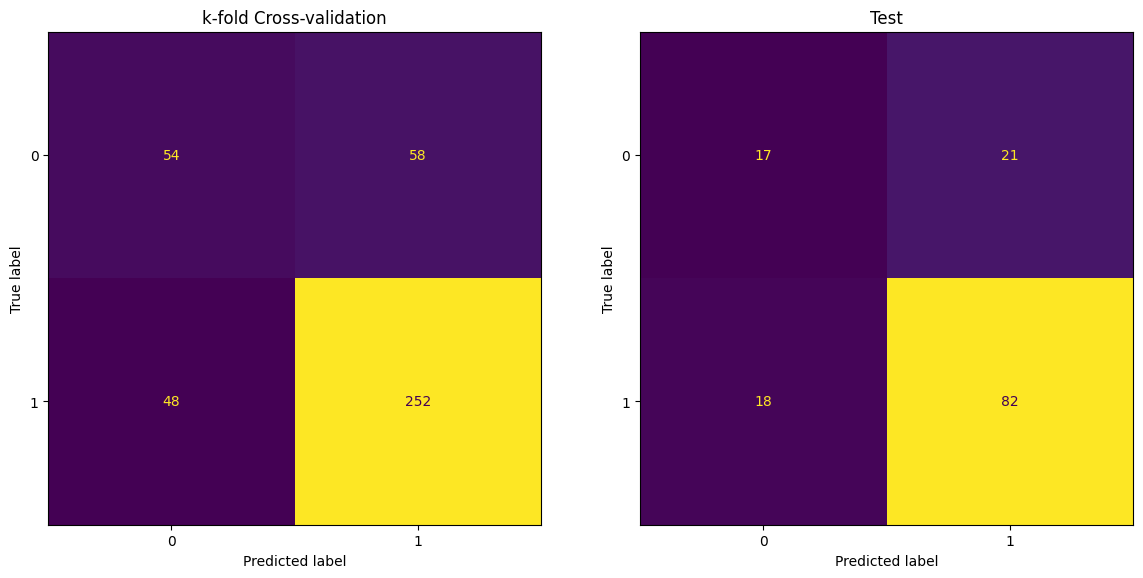

In [146]:
utils.gen_train_test_cm(y_train, y_pred_train_rf, y_test, y_pred_test_rf, ['Not-Diabetic', 'Diabetic'])

###### 

##### How do the ROC AUC plot look like?

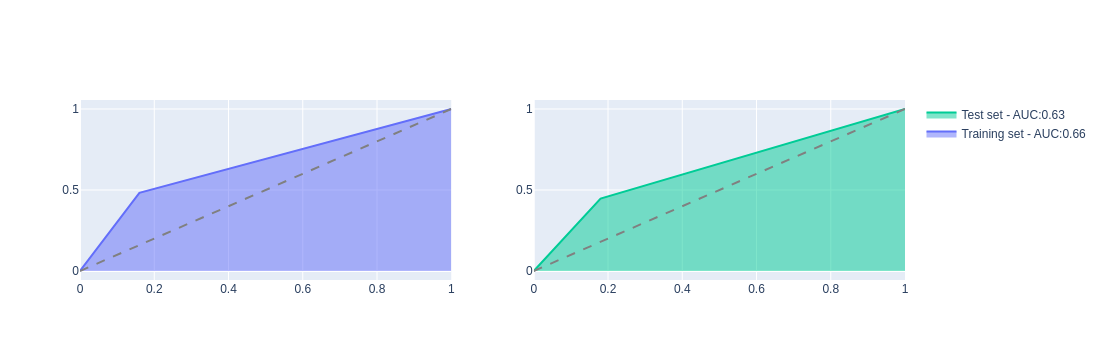

In [147]:
utils.gen_train_test_roc(y_train, y_pred_train_rf, y_test, y_pred_test_rf, ['Not-Diabetic', 'Diabetic'])

##### 

##### Which features are more important for the model?

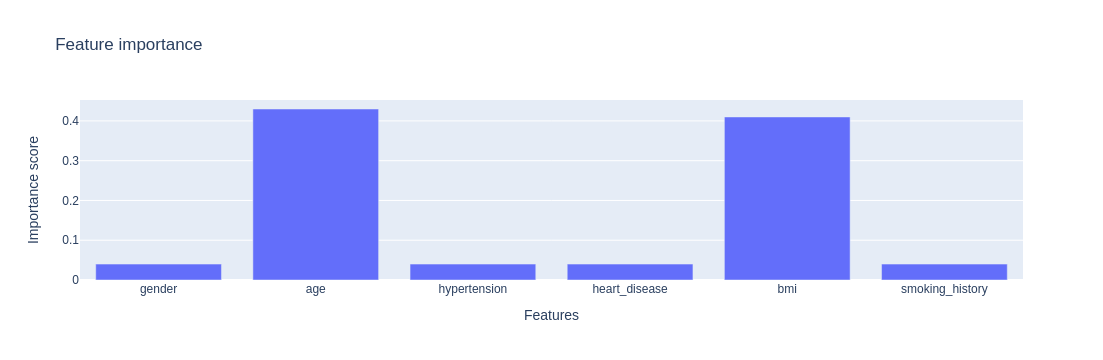

In [148]:
utils.feat_importance(clf_rf)

#### What can you conclude from the predictive performance of the Random Forest? What about its most import features? How can we compare the performance of Random Forest to the Decision Tree ?